# Step - 1 
## Introduction 

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. The dataset contains 15 columns. It has target and hence we can use supervised algorithms to build machine learning model. There are 14 attributes which are demographics and other features to describe a person.

# Step: 2
## Import the data and display the head, shape and description of the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

#### Display the first 5 records of the given dataset

In [2]:
df = pd.read_csv('adult.csv')
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

#### Display the shape of the dataset

In [3]:
df.shape

(48842, 15)

#### Check all the columns in the data set

In [4]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

#### Check data types of all the columns

In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

####  Descriptive statistics

In [6]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

## Exploratory Data Analysis and Visualization

#### Check for missing values

<AxesSubplot:>

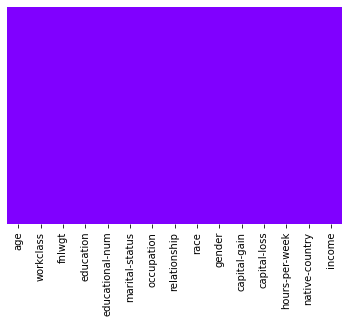

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'rainbow')

There are no null values in the given dataset, but from given dataset we can observe that their is special character('?') present in many columns. So lets check count of special character and replace them as nan values and will drop if percentage of null values is more if not treat them.

In [8]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [10]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:>

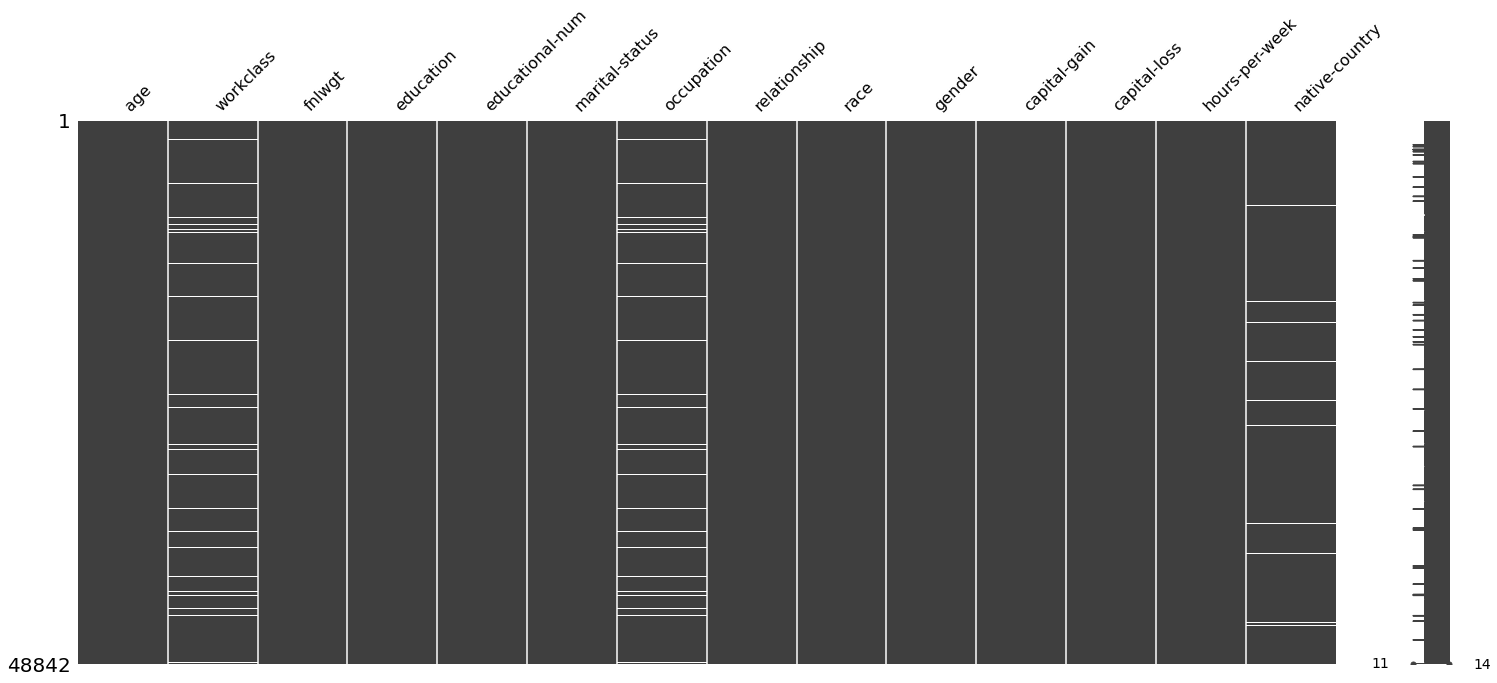

In [11]:
import missingno as msno
msno.matrix(df.drop('income',axis=1))

Observations:
Missing values present in given dataset due to '?' is less, so we can impute them while cleaning the data

#### Check for duplicates

In [12]:
df.duplicated().sum()

52

There 52 duplicated values,lets drop them.

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(48790, 15)

After droping the duplicated values the number of rows in the given dataset is reduced to 48790

#### Split the data into numerical and categorical

In [15]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

#### Check for unique values in each columns, as well as column names

In [16]:
print(numeric_data .apply(lambda col: col.nunique()))
numeric_data.columns.values

age                   74
fnlwgt             28523
educational-num       16
capital-gain         123
capital-loss          99
hours-per-week        96
dtype: int64


array(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'], dtype=object)

In [17]:
print(categorical_data .apply(lambda col: col.nunique()))
categorical_data.columns.values

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
gender             2
native-country    41
income             2
dtype: int64


array(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype=object)

## Univariate Analysis:

#### To understand the probability and frequency distribution of each numerical column

Skewness in "age" is 0.56
Kurtosis in "age" is -0.19
Skewness in "fnlwgt" is 1.44
Kurtosis in "fnlwgt" is 6.06
Skewness in "educational-num" is -0.31
Kurtosis in "educational-num" is 0.62
Skewness in "capital-gain" is 11.89
Kurtosis in "capital-gain" is 152.53
Skewness in "capital-loss" is 4.57
Kurtosis in "capital-loss" is 19.99
Skewness in "hours-per-week" is 0.24
Kurtosis in "hours-per-week" is 2.95


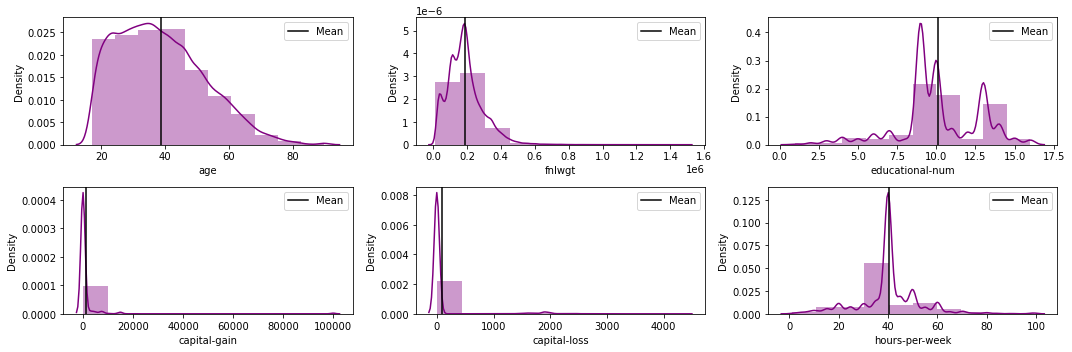

In [18]:
plt.figure(figsize=(15,5), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=9 :
        ax = plt.subplot(2,3,plotnumber) # rows,columns,current plot
        sns.distplot(numeric_data[column].dropna(axis = 0),color='purple',kde = True, bins = 10)
        plt.axvline(numeric_data[column].dropna(axis = 0).mean(), color = 'black', label ='Mean')
        plt.legend()
        skewed_value=round(numeric_data[column].skew(),2)
        kurtosis_value=round(numeric_data[column].kurt(),2)
        print('Skewness in "%s" is %s' %(column, skewed_value))
        print('Kurtosis in "%s" is %s' %(column, kurtosis_value))
    plotnumber+=1
plt.tight_layout() 

#### Inference:
From above plot it is clear that, the numerical columns are skewed due to presence of outliers. But the tail is either towards right or left normal distributed

#### To understand the frequency distribution of each categorical Variable/Column using countplot

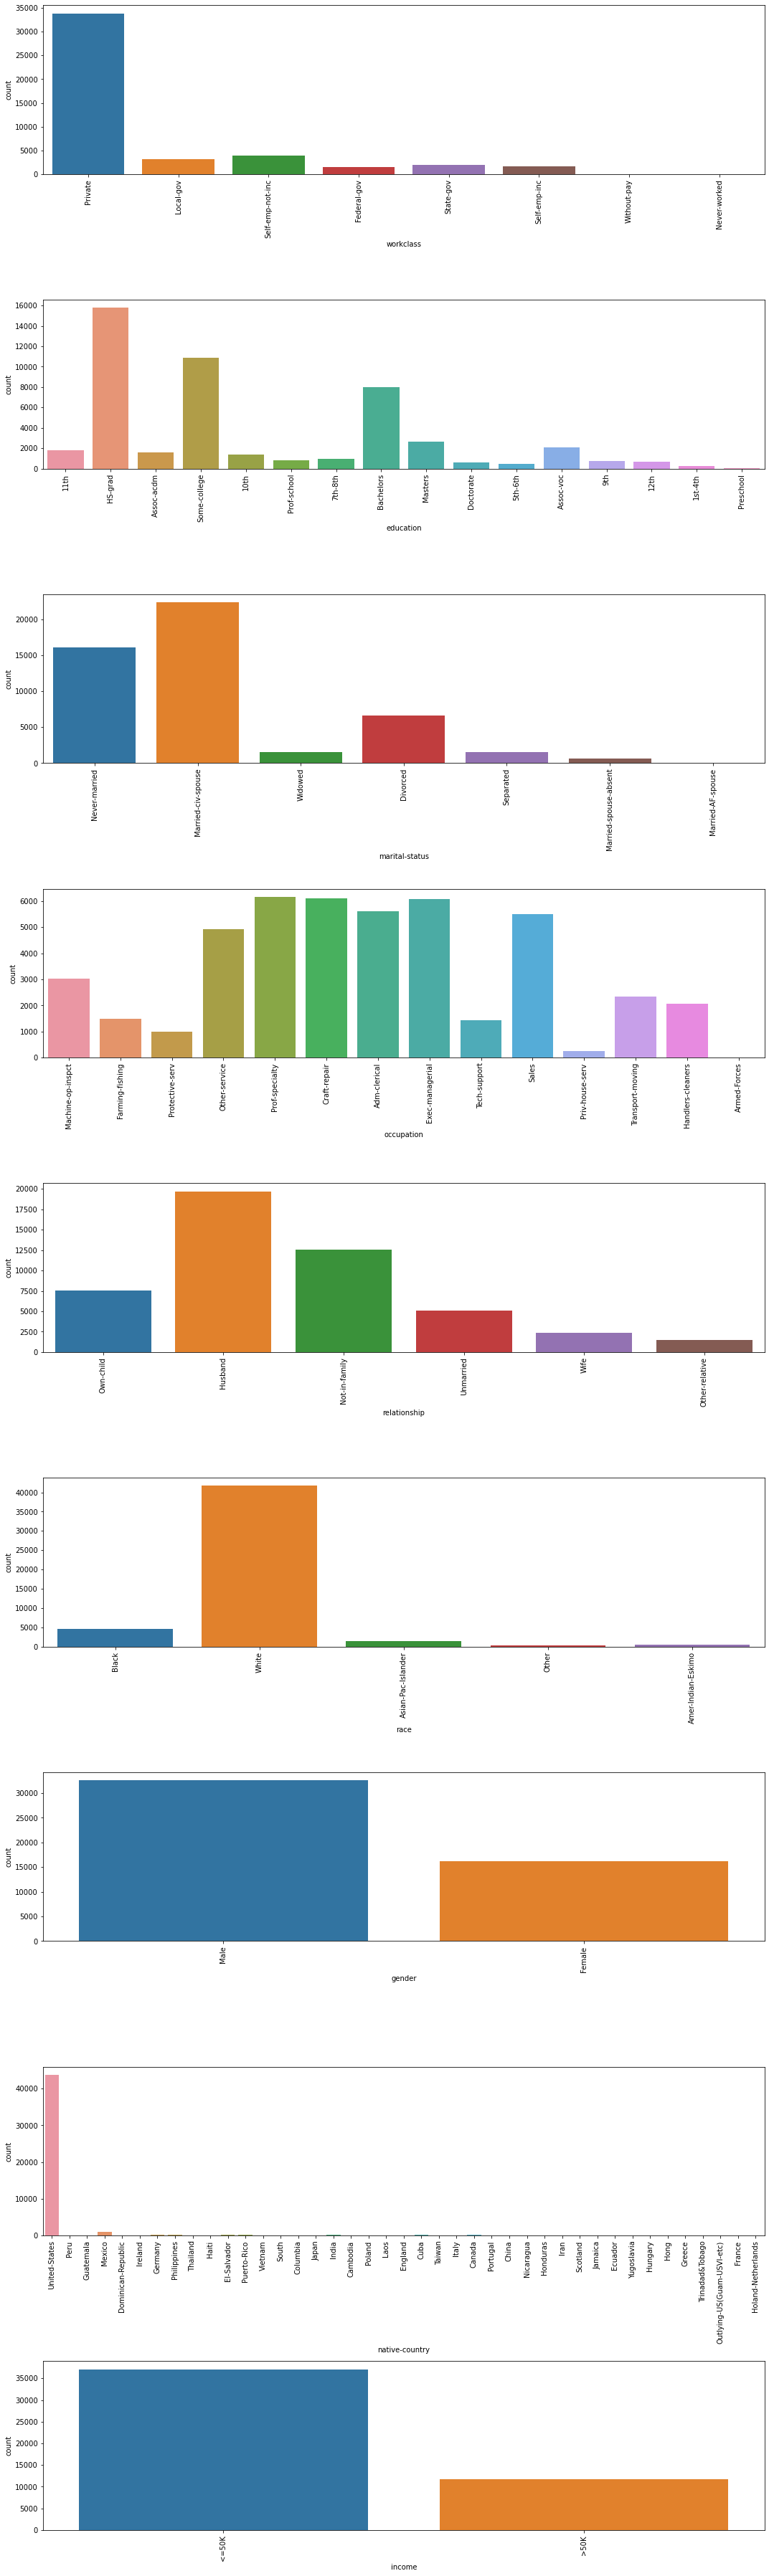

In [19]:
plt.figure(figsize=(15,50), facecolor='white')
plotnumber = 1

for column in categorical_data:
    if plotnumber<=9 :
        ax = plt.subplot(9,1,plotnumber) # rows,columns,current plot
        sns.countplot(categorical_data[column].dropna(axis = 0),data = df )
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

Observations:

1. Workclass column: The maximum people whose is from private jobs.
2. Education: The highest education is HS-grad.
3. Martial status : Married people are more in number
4. Occupation: The maximum people whose occuption is Exec-managerial, craft-repair and prof-speciality
5. Relationship: The source of income is more from Husband
6. Race: with respect to race, white people are maximum
7. Gender: Male count is more when compared to female
8. native-country: The works are from united states
9. income: The number of people whose income or earns <=50k is more    

# Bivarate Analysis

### Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc

#### Correlation between the features using heatmap

<AxesSubplot:>

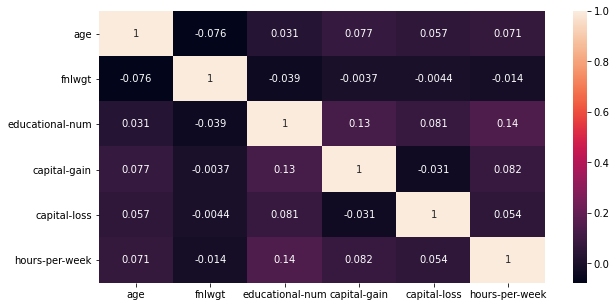

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True)

Observations:
From heatmap we can say that,
1. There is positive relation between educational-num and capital-gain
2. capital-loss and educational-num are positively correlated 
3. hours-per-week and educational-num are positively correlated 

sns.pairplot(data = df, hue = 'income')

# Step-5 
### Treat the outliers and missing values

#### Treating missing values
As we have seen in visualization there are missing values in column workclass, occupation and native-country, which are categorical type, so will use mode to treat the missing values

In [21]:
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [22]:
print('% of missing values:\n', (df.isnull().sum()*100/len(df)))

% of missing values:
 age                0.000000
workclass          5.728633
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.749129
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754458
income             0.000000
dtype: float64


In [23]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['workclass']]= imp.fit_transform(df[['workclass']])
df[['occupation']]= imp.fit_transform(df[['occupation']])
df[['native-country']]= imp.fit_transform(df[['native-country']])

In [24]:
df.isnull().sum().sum()

0

All the missing values are treated by using simple imputer by most_frequent value

### Find the outliers in each numerical column

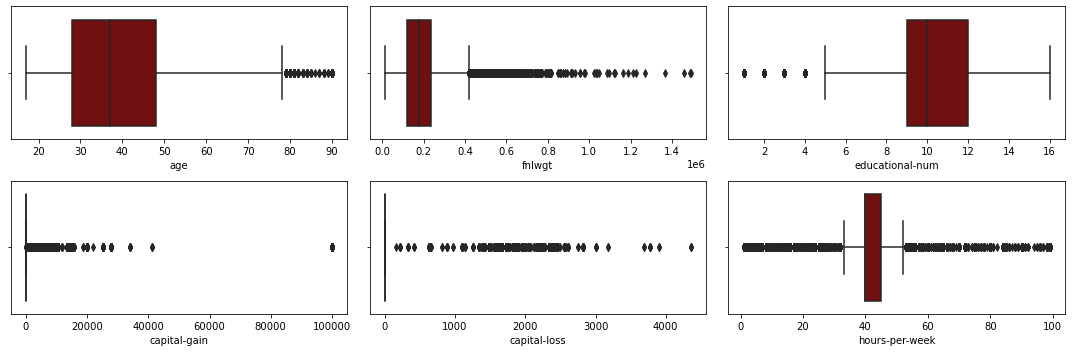

In [25]:
plt.figure(figsize=(15,5), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber) # rows,columns,current plot
        sns.boxplot(numeric_data[column].dropna(axis=0),orient='h',color='maroon')
    plotnumber+=1
plt.tight_layout() 

#### Inference:
From above boxplot to find outliers, it is very clear that there are outliers in all columns

In [26]:
#checking percentage/ amount of outliers

for i in numeric_data.columns:
  df.sort_values(by=i, ascending=True)
  q1, q3 = np.percentile(numeric_data[i], [25,75]) 
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = numeric_data[i][(numeric_data[i] < lower_bound) | (numeric_data[i] > upper_bound)] #creating a series of outlier data
  percentage = (outlier_data.count()/numeric_data[i].count())*100
  print('Outliers in "%s" is %.2f%% with count =  %.f\n' %(i, percentage, outlier_data.count()))
#   print('Percentiles in "%s" are: 25th = %.2f, 75th = %.2f, IQR = %.2f\n' % (i,q1, q3, iqr))

Outliers in "age" is 0.44% with count =  215

Outliers in "fnlwgt" is 2.98% with count =  1453

Outliers in "educational-num" is 3.66% with count =  1787

Outliers in "capital-gain" is 8.27% with count =  4035

Outliers in "capital-loss" is 4.68% with count =  2282

Outliers in "hours-per-week" is 27.64% with count =  13486



Feature 'hours-per-week' and 'black' has large % of outliers, so dropping them is not a good idea. But,if we replace such a big percentage of the outliers with some approach (mean, median...etc.) then it might result into less accurate or biased model. Lets treat them using Trimming method

##### Treating outlier in age column

<AxesSubplot:xlabel='age'>

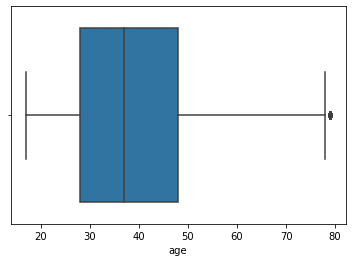

In [27]:
upper_limit = df['age'].mean() + 3*df['age'].std()
lower_limit = df['age'].mean() - 3*df['age'].std()
df['age'] = df[(df['age'] < upper_limit) & (df['age'] > lower_limit)]
sns.boxplot(x='age', data =df)

##### Treating outlier in 'fnlwgt' column

<AxesSubplot:xlabel='fnlwgt'>

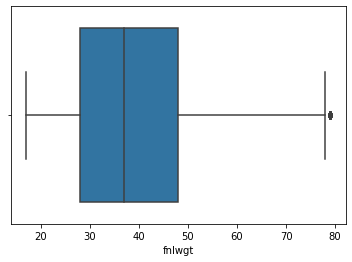

In [28]:
upper_limit = df['fnlwgt'].mean() + 3*df['fnlwgt'].std()
lower_limit = df['fnlwgt'].mean() - 3*df['fnlwgt'].std()
df['fnlwgt'] = df[(df['fnlwgt'] < upper_limit) & (df['fnlwgt'] > lower_limit)]
sns.boxplot(x='fnlwgt', data =df)

##### Treating outlier in 'educational-num' column

<AxesSubplot:xlabel='educational-num'>

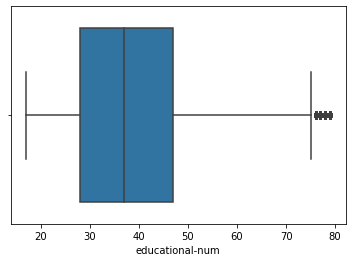

In [29]:
upper_limit = df['educational-num'].mean() + 3*df['educational-num'].std()
lower_limit = df['educational-num'].mean() - 3*df['educational-num'].std()
df['educational-num'] = df[(df['educational-num'] < upper_limit) & (df['educational-num'] > lower_limit)]
sns.boxplot(x='educational-num', data =df)

##### Treating outlier in 'capital-gain' column

<AxesSubplot:xlabel='capital-gain'>

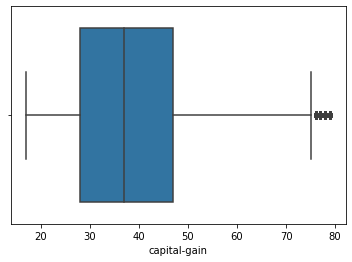

In [30]:
upper_limit = df['capital-gain'].mean() + 3*df['capital-gain'].std()
lower_limit = df['capital-gain'].mean() - 3*df['capital-gain'].std()
df['capital-gain'] = df[(df['capital-gain'] < upper_limit) & (df['capital-gain'] > lower_limit)]
sns.boxplot(x='capital-gain', data =df)

##### Treating outlier in 'capital-gain' column

<AxesSubplot:xlabel='capital-loss'>

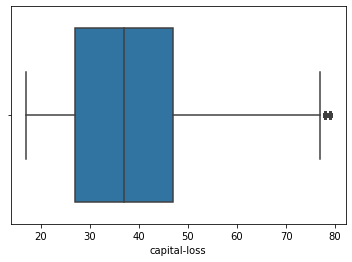

In [31]:
upper_limit = df['capital-loss'].mean() + 3*df['capital-loss'].std()
lower_limit = df['capital-loss'].mean() - 3*df['capital-loss'].std()
df['capital-loss'] = df[(df['capital-loss'] < upper_limit) & (df['capital-loss'] > lower_limit)]
sns.boxplot(x='capital-loss', data =df)

##### Treating outlier in 'hours-per-week' column

<AxesSubplot:xlabel='hours-per-week'>

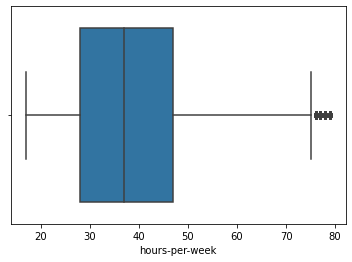

In [32]:
upper_limit = df['hours-per-week'].mean() + 3*df['hours-per-week'].std()
lower_limit = df['hours-per-week'].mean() - 3*df['hours-per-week'].std()
df['hours-per-week'] = df[(df['hours-per-week'] < upper_limit) & (df['hours-per-week'] > lower_limit)]
sns.boxplot(x='hours-per-week', data =df)

All most outliers are removed using trimming method

## Step - 7 - Perform feature transformation:

### For Numerical Features -> Do Column Standardization

In [33]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [34]:
columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week']
min_max = MinMaxScaler()
df[columns] = min_max.fit_transform(df[columns])
df.head()

age  workclass    fnlwgt     education educational-num  \
0  0.129032    Private  0.129032          11th        0.129032   
1   0.33871    Private   0.33871       HS-grad         0.33871   
2  0.177419  Local-gov  0.177419    Assoc-acdm        0.177419   
3  0.435484    Private  0.435484  Some-college        0.435484   
4  0.016129    Private  0.016129  Some-college        0.016129   

       marital-status         occupation relationship   race  gender  \
0       Never-married  Machine-op-inspct    Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing      Husband  White    Male   
2  Married-civ-spouse    Protective-serv      Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4       Never-married     Prof-specialty    Own-child  White  Female   

  capital-gain capital-loss hours-per-week native-country income  
0     0.129032     0.129032       0.129032  United-States  <=50K  
1      0.33871      0.33871        0.33871  United-States  <=50K  
2     0.177419     0.177419       0.177419  United-States   >50K  
3     0.435484     0.435484       0.435484  United-States   >50K  
4     0.016129     0.016129       0.016129  United-States  <=50K

### For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.

In [35]:
categorical_data.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['income'] = le.fit_transform(df['income'])

In [37]:
new_workclass = pd.get_dummies(df[['workclass']])
new_workclass

workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    1                       0   
3                          0                    0                       0   
4                          0                    0                       0   
...                      ...                  ...                     ...   
48837                      0                    0                       0   
48838                      0                    0                       0   
48839                      0                    0                       0   
48840                      0                    0                       0   
48841                      0                    0                       0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                      1                       0                           0   
1                      1                       0                           0   
2                      0                       0                           0   
3                      1                       0                           0   
4                      1                       0                           0   
...                  ...                     ...                         ...   
48837                  1                       0                           0   
48838                  1                       0                           0   
48839                  1                       0                           0   
48840                  1                       0                           0   
48841                  0                       1                           0   

       workclass_State-gov  workclass_Without-pay  
0                        0                      0  
1                        0                      0  
2                        0                      0  
3                        0                      0  
4                        0                      0  
...                    ...                    ...  
48837                    0                      0  
48838                    0                      0  
48839                    0                      0  
48840                    0                      0  
48841                    0                      0  

[48790 rows x 8 columns]